In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

%matplotlib inline

In [2]:
df_raw = pd.read_excel('Failure_Data_06292021_MoCaSPoV_v1.1.xlsx', sheet_name='DataTill233064', parse_dates=True)

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000):
        with pd.option_context("display.max_columns", 1000):
            display(df)

In [4]:
display_all(df_raw.head())

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,0.0,0,0,NaN,MSF-029096,NaN,01GV331,Lenovo,NaN,NaN,MSF-032904,MSF-022488,2021-12-03 14:57:30.080,Installed,MSF-029096,SvrPwrSup,EX-TIER3-RACK-24-C1040L-MSF-032904-6.7TB-G5.7-...,EX-M1030-MSF-022488-V2-REVA,NO,United Kingdom,EMEA,LON23,Europe,1.0,Lenovo,Lenovo - 1600W (PL1600H) non-LES power supplies,SvrPwrSup,X900301-001,MSF-038261,MSF-038261,2019-08-02,EOL,Gen5,YES,INW,NO,2.0,2019-06-12 14:41:13.415000,2019-06-12 14:41:13.415000,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
1,AM1,1332523,SMC114000A9,Cisco,WS-C6509-E,MSF-001184,NaN,XENPAK-10GB-SR,Trnscvr,Cisco,0.0,0,0,NaN,MSF-001184,NaN,XENPAK-10GB-SR=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001184,Trnscvr,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,XENPAK-10GB-SR,Trnscvr,M1064312-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,2.0,2019-05-19 22:00:00,2019-05-22 13:19:02.727000,2019-05-18 15:20:41.185000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-05-22 13:19:02.727000,-1.110809,1,a.0-6 months
2,AM1,1332525,SMC11430087,Cisco,WS-C6509-E,MSF-001175,SAL114670XH,WS-X6748-SFP=,NetBlade,Cisco,0.0,1,0,4753322,MSF-001175,SAL1444YLEQ,WS-X6748-SFP=,Cisco,NaN,Network Device: FRU Replacement Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001175,NetBlade,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-X6748-SFP,NetBlade,M1051435-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2020-02-21 08:43:20.600000,2020-02-21 08:43:20.600000,2020-02-25 03:56:27.622000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-02-21 08:43:20.600000,-0.357908,1,a.0-6 months
3,AM1,1332526,SMC1140008P,Cisco,WS-C6509-E,MSF-001104,NaN,WS-CAC-4000W-INT=,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001104,NaN,WS-CAC-4000W-INT=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001104,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-CAC-4000W-INT,NetPwrSup,NaN,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2019-07-11 10:31:30.243000,2019-07-11 10:31:30.243000,2019-07-12 12:13:55.797000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-07-11 10:31:30.243000,-0.974141,1,a.0-6 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,0.0,0,1,NaN,MSF-001053,NaN,PWR-C49-300AC,Cisco,NaN,Network Device: General Investigation Support,NaN,NaN,NaT,NaN,MSF-001053,NetPwrSup,NaN,NaN,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,PWR-C49-300AC,NetPwrSup,M1056857-001,NaN,NaN,NaT,NOT EOL,"CatalogM1, Gen1, Gen2",NO,NaN,NO,2.0,2020-10-02 06:25:00,00:00:00,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00

In [5]:
df_raw_no_outlier = df_raw[df_raw['Outlier']==0]

In [12]:
df_raw_no_outlier.PARENTSERIALNUMBER = df_raw_no_outlier.PARENTSERIALNUMBER.astype('str')

C:\Users\v-haabhi\Anaconda3_1\lib\site-packages\pandas\core\generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [13]:
df_raw_no_outlier.head()

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,...,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,...,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,...,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-01 17:26:12.175000,0.254045,0,a.0-6 months
6,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,4000W-AC-US,NetPwrSup,Cisco,...,2020-10-07 03:24:25.212000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-06 11:26:00.263000,0.267059,0,a.0-6 months
7,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,WS-CAC-4000W,NetPwrSup,Cisco,...,2020-10-02 01:28:20.127000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-09-17 15:03:10.517000,0.215417,0,a.0-6 months
8,DB3,1627122,TBM12306213,Cisco,N7K-C7010 10 Slot Chassis,MSF-001700,NaN,SFP-10G-SR=,Trnscvr,Cisco,...,2021-03-01 17:53:34.311000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2021-03-03 12:33:07.381000,0.672666,0,b.6-12 months


In [17]:
for n,c in df_raw_no_outlier.items():
    if df_raw_no_outlier[n].dtype == 'O':
        df_raw_no_outlier[n] = df_raw_no_outlier[n].astype('str')

<ipython-input-17-6568188b12f9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_no_outlier[n] = df_raw_no_outlier[n].astype('str')


In [18]:
import feather
import os

os.makedirs('temp', exist_ok = True)
df_raw_no_outlier.reset_index().to_feather('temp\df_raw_no_outlier')


In [6]:
display_all(df_raw_no_outlier.describe(include='all'))

<ipython-input-6-bcff7ce1e90f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display_all(df_raw_no_outlier.describe(include='all'))
<ipython-input-6-bcff7ce1e90f>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  display_all(df_raw_no_outlier.describe(include='all'))


,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
count,226771,226771.0,226771,226771,224899,224149,117976,224142,224145,217595,226740.000000,226771.000000,226771.000000,3751.0,226771,118226,226770,223291,0.0,87119,222651,218515,222653,222655,226771,226771,222651,218514,226767,226767,226767,226767,226767,226767.000000,226767,226767,226765,218635,56309,166471,50070,226388,200115,226765,222647,226765,115162.000000,226771,226771,226771,226765,226765,226765,226765,226771,226771,226771.000000,226771.0,226771
unique,121,134430.0,134436,31,248,1819,117728,2466,60,65,NaN,NaN,NaN,3616.0,1921,96981,2187,64,NaN,81,864,703,20330,3,1895,56,864,703,2,26,1,112,3,NaN,69,1778,54,1063,238,678,217,2,164,2,2,2,NaN,211830,214825,224004,23277,23330,25,26,23280,225991,NaN,NaN,9
top,AMS20,10603125.0,1S3989AC1S40ZFRM,Wiwynn,WCS C1040 Server,MSF-029397,4H882902001,M1016777-001,SvrSSD,Samsung,NaN,NaN,NaN,13299756.0,MSF-029397,NOT ACCESSIBLE,M1016777-001,Samsung,NaN,Server: Hard Disk (HDD) Replacement,MSF-032771,MSF-032670,2021-06-30 00:00:00,Installed,MSF-029397,SvrSSD,EX-TIER2-RACK-36-C1040L-MSF-032771-6.7TB-G5.7-...,SRV-WCS-C1040-COMPUTE-GEN5.1-INTEL-LENOVO-HALF...,NO,Netherlands,EMEA,AMS05,Europe,NaN,Samsung,"Wiwynn - SDD,960GB,SSD,M.2,NVME,PM963,SAMSUNG,...",SvrSSD,M1016777-001,MSF-023725,MSF-023725,2020-04-20 00:00:00,NOT EOL,Gen5,YES,INW,NO,NaN,00:00:00,00:00:00,00:00:00,2017-06-29 00:00:00,2020-06-30 00:00:00,00:00:00,2021-06-30 00:00:00,2017-06-29 00:00:00,00:00:00,NaN,NaN,g.3-4 years
freq,28654,58.0,58,65075,88567,7622,5,7580,57905,49691,NaN,NaN,NaN,3.0,7617,14502,7620,53495,NaN,36649,7086,9519,116485,220709,7622,58718,7086,9518,221327,97780,226767,47281,221218,NaN,50244,7620,58728,14041,7620,7620,5809,176318,41143,153499,213033,137494,NaN,11106,11185,2628,1529,1730,97081,117513,1529,6,NaN,NaN,35804
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-10-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-03-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2118-07-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021-06-25 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.023992,0.113617,0.025149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.998113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.159801,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.238661,0.0,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.153025,0.317346,0.156577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.639684,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.540330,0.0,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0000

In [7]:
display_all(df_raw_no_outlier.head())

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,0.0,0,0,NaN,MSF-029096,NaN,01GV331,Lenovo,NaN,NaN,MSF-032904,MSF-022488,2021-12-03 14:57:30.080,Installed,MSF-029096,SvrPwrSup,EX-TIER3-RACK-24-C1040L-MSF-032904-6.7TB-G5.7-...,EX-M1030-MSF-022488-V2-REVA,NO,United Kingdom,EMEA,LON23,Europe,1.0,Lenovo,Lenovo - 1600W (PL1600H) non-LES power supplies,SvrPwrSup,X900301-001,MSF-038261,MSF-038261,2019-08-02,EOL,Gen5,YES,INW,NO,2.0,2019-06-12 14:41:13.415000,2019-06-12 14:41:13.415000,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,0.0,0,1,NaN,MSF-001053,NaN,PWR-C49-300AC,Cisco,NaN,Network Device: General Investigation Support,NaN,NaN,NaT,NaN,MSF-001053,NetPwrSup,NaN,NaN,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,PWR-C49-300AC,NetPwrSup,M1056857-001,NaN,NaN,NaT,NOT EOL,"CatalogM1, Gen1, Gen2",NO,NaN,NO,2.0,2020-10-02 06:25:00,00:00:00,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-01 17:26:12.175000,0.254045,0,a.0-6 months
6,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,4000W-AC-US,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001103,NaN,WS-CAC-4000W,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001103,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,WS-CAC-4000W-US,NetPwrSup,M1056858-001,NaN,NaN,2013-03-25,EOL,NaN,NO,INW,NO,NaN,2020-10-02 09:07:22.540000,2020-10-06 11:26:00.263000,2020-10-07 03:24:25.212000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-06 11:26:00.263000,0.267059,0,a.0-6 months
7,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,WS-CAC-4000W,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001103,NaN,WS-CAC-4000W,Cisco,NaN,Device: Power Supply,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001103,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,WS-CAC-4000W-US,NetPwrSup,M1056858-001,NaN,NaN,2013-03-25,EOL,NaN,NO,INW,NO,NaN,2020-09-17 11:03:00,2020-09-17 15:03:10.517000,2020-10-02 01:28:20.127000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-09-17 15:03:10.517000,0.215417,0,a.0-6 months
8,DB3,1627122,TBM12306213,Cisco,N7K-C7010 10 Slot Chassis,MSF-001700,NaN,SFP-10G-SR=,Trnscvr,Cisco,0.0,0,0,NaN,MSF-001700,NaN,SFP-10G-SR=,Cisco,NaN,Device: Cable Replacement,MSF-016804,MSF-016804,2021-06-30 00:00:00.000,Installed,MSF-001700,Trnscvr,N7K-C7010 10 Slot Chassis,N7K-C7010 10 Slot Chassis,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,Cisco - SFP-10G-SR= - 10GBASE-SR SFP+ Module,Trnscvr,M1064318-001,NaN,NaN,NaT,NOT EOL,"CatalogG5, CatalogG8, CatalogM1, Gen2, Gen3, ...",NO,INW,NO,40.0,2021-03-03 12:33:07.381000,2021-03-03 12:33:07.381000,2021-03-01 17:53:34.311000,00:00:00,1900-01

In [8]:
df_raw_dc_group = df_raw_no_outlier.groupby('DATACENTER')

In [9]:
df_failed_by_dc = df_raw_dc_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

In [10]:
display_all(df_failed_by_dc.head())

,DATACENTER,FAILEDPARTMSF
0,AMS20,28299
1,AMS06,24904
2,DUB07,13585
3,AMS07,12772
4,DUB08,12462


In [11]:
df_failed_by_dc = df_failed_by_dc.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'})

In [12]:
df_failed_by_dc.describe()

,Count of FAILEDPARTMSF
count,121.000000
mean,1852.471074
std,4339.034589
min,0.000000
25%,3.000000
50%,50.000000
75%,1289.000000
max,28299.000000


In [13]:
df_failed_by_dc['Count of FAILEDPARTMSF'].sum()

224149

In [14]:
df_failed_by_dc['Count of FAILEDPARTMSF2']=(df_failed_by_dc['Count of FAILEDPARTMSF']/(df_failed_by_dc['Count of FAILEDPARTMSF'].sum()))*100

In [15]:
display_all(df_failed_by_dc)

,DATACENTER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2
0,AMS20,28299,12.625084
1,AMS06,24904,11.110467
2,DUB07,13585,6.060701
3,AMS07,12772,5.697996
4,DUB08,12462,5.559695
5,VIE,12268,5.473145
6,AMS05,8863,3.954066
7,LON21,8379,3.738138
8,CWL20,8259,3.684603
9,DUB06,7387,3.295576


In [16]:
!pip install pyarrow

In [17]:
import feather
import os

os.makedirs('temp', exist_ok = True)
df_failed_by_dc.to_feather('temp\df_failed_by_dc')


In [18]:
#df_raw.to_feather('temp\df_raw')

In [19]:
display_all(df_raw.head())

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,0.0,0,0,NaN,MSF-029096,NaN,01GV331,Lenovo,NaN,NaN,MSF-032904,MSF-022488,2021-12-03 14:57:30.080,Installed,MSF-029096,SvrPwrSup,EX-TIER3-RACK-24-C1040L-MSF-032904-6.7TB-G5.7-...,EX-M1030-MSF-022488-V2-REVA,NO,United Kingdom,EMEA,LON23,Europe,1.0,Lenovo,Lenovo - 1600W (PL1600H) non-LES power supplies,SvrPwrSup,X900301-001,MSF-038261,MSF-038261,2019-08-02,EOL,Gen5,YES,INW,NO,2.0,2019-06-12 14:41:13.415000,2019-06-12 14:41:13.415000,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
1,AM1,1332523,SMC114000A9,Cisco,WS-C6509-E,MSF-001184,NaN,XENPAK-10GB-SR,Trnscvr,Cisco,0.0,0,0,NaN,MSF-001184,NaN,XENPAK-10GB-SR=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001184,Trnscvr,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,XENPAK-10GB-SR,Trnscvr,M1064312-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,2.0,2019-05-19 22:00:00,2019-05-22 13:19:02.727000,2019-05-18 15:20:41.185000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-05-22 13:19:02.727000,-1.110809,1,a.0-6 months
2,AM1,1332525,SMC11430087,Cisco,WS-C6509-E,MSF-001175,SAL114670XH,WS-X6748-SFP=,NetBlade,Cisco,0.0,1,0,4753322,MSF-001175,SAL1444YLEQ,WS-X6748-SFP=,Cisco,NaN,Network Device: FRU Replacement Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001175,NetBlade,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-X6748-SFP,NetBlade,M1051435-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2020-02-21 08:43:20.600000,2020-02-21 08:43:20.600000,2020-02-25 03:56:27.622000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-02-21 08:43:20.600000,-0.357908,1,a.0-6 months
3,AM1,1332526,SMC1140008P,Cisco,WS-C6509-E,MSF-001104,NaN,WS-CAC-4000W-INT=,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001104,NaN,WS-CAC-4000W-INT=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001104,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-CAC-4000W-INT,NetPwrSup,NaN,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2019-07-11 10:31:30.243000,2019-07-11 10:31:30.243000,2019-07-12 12:13:55.797000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-07-11 10:31:30.243000,-0.974141,1,a.0-6 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,0.0,0,1,NaN,MSF-001053,NaN,PWR-C49-300AC,Cisco,NaN,Network Device: General Investigation Support,NaN,NaN,NaT,NaN,MSF-001053,NetPwrSup,NaN,NaN,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,PWR-C49-300AC,NetPwrSup,M1056857-001,NaN,NaN,NaT,NOT EOL,"CatalogM1, Gen1, Gen2",NO,NaN,NO,2.0,2020-10-02 06:25:00,00:00:00,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00

In [19]:
df_SparesAgeDetails_raw = pd.read_excel('SparesMSF_AgeDetails_07052021.xlsx')

display_all(df_SparesAgeDetails_raw.head())

,SPARESMSF,BOMTYPE,SKUFINANCIALMASTERID,DATACENTERCODE,WARRANTY_STATUS,AgeBucket,count
0,MSF-000004,SvrNIC,MSF-023268,HEL01,INW,60M+,256
1,MSF-000004,SvrNIC,MSF-023268,KUL01,INW,60M+,64
2,MSF-000032,SvrBattery,LGY-000064,PR1,INW,NaN,2
3,MSF-000032,SvrBattery,LGY-000069,BLU,INW,60M+,1
4,MSF-000032,SvrBattery,MSF-001811,SN1,OOW,60M+,2


In [20]:
df_SparesAgeDetails_raw.to_feather('temp\df_SparesAgeDetails_raw')

In [21]:
# Sum of spares count grouped by DCs
df_SparesAgeDetails_dc_group = df_SparesAgeDetails_raw.groupby('DATACENTERCODE')
df_SparesAgeDetails_by_dc = df_SparesAgeDetails_dc_group.sum()[['count']].sort_values(by='count',ascending=False).reset_index()

In [22]:
df_SparesAgeDetails_by_dc.head()

,DATACENTERCODE,count
0,BN6,3708247
1,DSM05,3546873
2,MWH01,3441320
3,CYS04,3279452
4,AMS06,3163654


In [23]:
df_SparesAgeDetails_by_dc[df_SparesAgeDetails_by_dc['DATACENTERCODE']=='AMS20']

,DATACENTERCODE,count
6,AMS20,3055287


In [24]:
# Merge with df_failed_by_dc to get InstalledBase and FR%
df_failed_by_dc = df_failed_by_dc.merge(df_SparesAgeDetails_by_dc, left_on='DATACENTER', right_on='DATACENTERCODE')
df_failed_by_dc.drop(labels='DATACENTERCODE', axis=1, inplace=True)

df_failed_by_dc = df_failed_by_dc.rename(columns={'count':'InstalledBase'})
df_failed_by_dc['FR%'] = df_failed_by_dc['Count of FAILEDPARTMSF']/df_failed_by_dc['InstalledBase']*100

In [25]:
df_failed_by_dc.head()

,DATACENTER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,InstalledBase,FR%
0,AMS20,28299,12.625084,3055287,0.926230
1,AMS06,24904,11.110467,3163654,0.787191
2,DUB07,13585,6.060701,1572174,0.864090
3,AMS07,12772,5.697996,2894477,0.441254
4,DUB08,12462,5.559695,1705245,0.730804


In [26]:
df_failed_by_dc.to_feather('temp\df_failed_by_dc')

In [27]:
df_SparesAgeDetails_raw.head()

,SPARESMSF,BOMTYPE,SKUFINANCIALMASTERID,DATACENTERCODE,WARRANTY_STATUS,AgeBucket,count
0,MSF-000004,SvrNIC,MSF-023268,HEL01,INW,60M+,256
1,MSF-000004,SvrNIC,MSF-023268,KUL01,INW,60M+,64
2,MSF-000032,SvrBattery,LGY-000064,PR1,INW,NaN,2
3,MSF-000032,SvrBattery,LGY-000069,BLU,INW,60M+,1
4,MSF-000032,SvrBattery,MSF-001811,SN1,OOW,60M+,2


In [28]:
display_all(df_raw.head())

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,0.0,0,0,NaN,MSF-029096,NaN,01GV331,Lenovo,NaN,NaN,MSF-032904,MSF-022488,2021-12-03 14:57:30.080,Installed,MSF-029096,SvrPwrSup,EX-TIER3-RACK-24-C1040L-MSF-032904-6.7TB-G5.7-...,EX-M1030-MSF-022488-V2-REVA,NO,United Kingdom,EMEA,LON23,Europe,1.0,Lenovo,Lenovo - 1600W (PL1600H) non-LES power supplies,SvrPwrSup,X900301-001,MSF-038261,MSF-038261,2019-08-02,EOL,Gen5,YES,INW,NO,2.0,2019-06-12 14:41:13.415000,2019-06-12 14:41:13.415000,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
1,AM1,1332523,SMC114000A9,Cisco,WS-C6509-E,MSF-001184,NaN,XENPAK-10GB-SR,Trnscvr,Cisco,0.0,0,0,NaN,MSF-001184,NaN,XENPAK-10GB-SR=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001184,Trnscvr,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,XENPAK-10GB-SR,Trnscvr,M1064312-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,2.0,2019-05-19 22:00:00,2019-05-22 13:19:02.727000,2019-05-18 15:20:41.185000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-05-22 13:19:02.727000,-1.110809,1,a.0-6 months
2,AM1,1332525,SMC11430087,Cisco,WS-C6509-E,MSF-001175,SAL114670XH,WS-X6748-SFP=,NetBlade,Cisco,0.0,1,0,4753322,MSF-001175,SAL1444YLEQ,WS-X6748-SFP=,Cisco,NaN,Network Device: FRU Replacement Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001175,NetBlade,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-X6748-SFP,NetBlade,M1051435-001,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2020-02-21 08:43:20.600000,2020-02-21 08:43:20.600000,2020-02-25 03:56:27.622000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-02-21 08:43:20.600000,-0.357908,1,a.0-6 months
3,AM1,1332526,SMC1140008P,Cisco,WS-C6509-E,MSF-001104,NaN,WS-CAC-4000W-INT=,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001104,NaN,WS-CAC-4000W-INT=,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001104,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,WS-CAC-4000W-INT,NetPwrSup,NaN,NaN,NaN,NaT,NOT EOL,NaN,NO,INW,NO,NaN,2019-07-11 10:31:30.243000,2019-07-11 10:31:30.243000,2019-07-12 12:13:55.797000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2019-07-11 10:31:30.243000,-0.974141,1,a.0-6 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,0.0,0,1,NaN,MSF-001053,NaN,PWR-C49-300AC,Cisco,NaN,Network Device: General Investigation Support,NaN,NaN,NaT,NaN,MSF-001053,NetPwrSup,NaN,NaN,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,PWR-C49-300AC,NetPwrSup,M1056857-001,NaN,NaN,NaT,NOT EOL,"CatalogM1, Gen1, Gen2",NO,NaN,NO,2.0,2020-10-02 06:25:00,00:00:00,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00

#### Create dataframes by  grouping on FAILEDPARTITEMGROUP, PARENTMANUFACTURER, FAILEDMANUFACTURER, SPAREMANUFACTURER

With existing groupby object, apply count on FAILEDPARTMSF to get total failed parts msf by that group

In [29]:
df_raw_failedpartitemgroup_group = df_raw_no_outlier.groupby('FAILEDPARTITEMGROUP')
df_SparesAgeDetails_BOM_group = df_SparesAgeDetails_raw.groupby('BOMTYPE')
df_failed_by_itemgroup = df_raw_failedpartitemgroup_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

df_raw_parentmanufacturer_group = df_raw_no_outlier.groupby('PARENTMANUFACTURER')
df_failed_by_parentmanufacturer = df_raw_parentmanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

df_raw_failedmanufacturer_group = df_raw_no_outlier.groupby('FAILEDMANUFACTURER')
df_failed_by_failedmanufacturer = df_raw_failedmanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

df_raw_sparemanufacturer_group = df_raw_no_outlier.groupby('SPAREMANUFACTURER')
df_failed_by_sparemanufacturer = df_raw_sparemanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

### Univariate Failed Parts by FailedPartsItemGroup

#### Rename FAILEDPARTMSF Column to "Count of FAILEDPARTMSF"

In [30]:
df_failed_by_itemgroup.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)

In [31]:
df_failed_by_itemgroup.head()

,FAILEDPARTITEMGROUP,Count of FAILEDPARTMSF
0,SvrSSD,57905
1,SvrHD,49285
2,SvrMemory,41220
3,SvrProc,11068
4,SvrMotherb,10633


#### Add percentage of failed parts by itemgroup and name it "Count of FAILEDPARTMSF2"

In [32]:
df_failed_by_itemgroup['Count of FAILEDPARTMSF2']=(df_failed_by_itemgroup['Count of FAILEDPARTMSF']/(df_failed_by_itemgroup['Count of FAILEDPARTMSF'].sum()))*100

In [33]:
df_failed_by_itemgroup.head()

,FAILEDPARTITEMGROUP,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2
0,SvrSSD,57905,25.833724
1,SvrHD,49285,21.987999
2,SvrMemory,41220,18.389882
3,SvrProc,11068,4.937875
4,SvrMotherb,10633,4.743804


#### Merge with SpareAgeDetails to get the InstalledBase and then calculate FR%

InstalledBase is the sum of the counts of spare parts installed for each item group (BOMTYPE) from the excel report - SparesMSF_AgeDetails_07052021.xlsx. Therefore, merge these two data on BOMTYPE and FAILEDPARTITEMGROUP

FR% is then calculated as Count of FAILEDPARTMSF / InstalledBase

In [34]:
df_SparesAgeDetails_by_BOM = df_SparesAgeDetails_BOM_group.sum()[['count']].sort_values(by='count',ascending=False).reset_index()

In [35]:
df_SparesAgeDetails_by_BOM.head()

,BOMTYPE,count
0,SvrCable,21519398
1,SvrMisc,15265098
2,DAC Cable,14614106
3,SvrSSD,8411719
4,SvrPwrSup,7755909


In [36]:
df_failed_by_itemgroup = df_failed_by_itemgroup.merge(df_SparesAgeDetails_by_BOM, left_on='FAILEDPARTITEMGROUP', right_on='BOMTYPE')
df_failed_by_itemgroup.rename(columns={'count':'InstalledBase'}, inplace=True)
df_failed_by_itemgroup.drop(labels=['BOMTYPE'], axis=1, inplace=True)

df_failed_by_itemgroup['FR%'] = df_failed_by_itemgroup['Count of FAILEDPARTMSF']/df_failed_by_itemgroup['InstalledBase']*100

In [37]:
df_failed_by_itemgroup.head()

,FAILEDPARTITEMGROUP,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,InstalledBase,FR%
0,SvrSSD,57905,25.833724,8411719,0.688385
1,SvrHD,49285,21.987999,3590746,1.372556
2,SvrMemory,41220,18.389882,6516506,0.632548
3,SvrProc,11068,4.937875,5500445,0.201220
4,SvrMotherb,10633,4.743804,6299811,0.168783


In [38]:
df_failed_by_itemgroup.to_feather('temp\df_failed_by_itemgroup') #keep saving the perpared datasets in lightweigt file formats for easy access

In [39]:
df_failed_by_itemgroup['Count of FAILEDPARTMSF'].sum()

222770

### Univariate Failed Parts grouped by PARENTMANUFACTURER

Group the raw dataset as such:-
```
df_raw_parentmanufacturer_group = df_raw.groupby('PARENTMANUFACTURER')
df_failed_by_parentmanufacturer = df_raw_parentmanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()
```

In [40]:
df_failed_by_parentmanufacturer.head()

,PARENTMANUFACTURER,FAILEDPARTMSF
0,Wiwynn,64975
1,HP,50033
2,Lenovo,32771
3,ZT,29020
4,Arvato,13909


#### Rename FAILEDPARTMSF Column to "Count of FAILEDPARTMSF" and calculate percentage count into Count of FAILEDPARTMSF2

In [41]:
df_failed_by_parentmanufacturer.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)

# make Count of FAILEDPARTMSF2
df_failed_by_parentmanufacturer['Count of FAILEDPARTMSF2']=(df_failed_by_parentmanufacturer['Count of FAILEDPARTMSF']/(df_failed_by_parentmanufacturer['Count of FAILEDPARTMSF'].sum()))*100

# check data again

df_failed_by_parentmanufacturer.head()

,PARENTMANUFACTURER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2
0,Wiwynn,64975,28.987415
1,HP,50033,22.321313
2,Lenovo,32771,14.620186
3,ZT,29020,12.946745
4,Arvato,13909,6.205247


How to calculate Total for this dataset - 

In [42]:
df_failed_by_parentmanufacturer[['Count of FAILEDPARTMSF']].sum()

Count of FAILEDPARTMSF    224149
dtype: int64

In [43]:
df_failed_by_parentmanufacturer.to_feather('temp\df_failed_by_parentmanufacturer')

### Univariate Failed Parts grouped by FAILEDMANUFACTURER

Group the raw data as such:-
```
df_raw_failedmanufacturer_group = df_raw.groupby('FAILEDMANUFACTURER')
df_failed_by_failedmanufacturer = df_raw_failedmanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

```

In [44]:
df_failed_by_failedmanufacturer.head()

,FAILEDMANUFACTURER,FAILEDPARTMSF
0,Samsung,49691
1,HPE,28147
2,Seagate,24881
3,Hynix,24716
4,Micron,11967


In [45]:
df_failed_by_failedmanufacturer.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)
df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF2']=(df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF']/(df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF'].sum()))*100

In [46]:
df_failed_by_failedmanufacturer.head()

,FAILEDMANUFACTURER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2
0,Samsung,49691,22.836462
1,HPE,28147,12.935499
2,Seagate,24881,11.434546
3,Hynix,24716,11.358717
4,Micron,11967,5.499667


Find the Sum of ONHAND_DC for each FAILEDMANUFACTURER

In [47]:
df_failed_by_failedmanufacturer['Sum of ONHAND_DC'] = df_raw_failedmanufacturer_group.sum()['ONHAND_DC'].loc[df_failed_by_failedmanufacturer['FAILEDMANUFACTURER']].values

In [48]:
df_failed_by_failedmanufacturer.head()

,FAILEDMANUFACTURER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,Sum of ONHAND_DC
0,Samsung,49691,22.836462,239268.0
1,HPE,28147,12.935499,604256.0
2,Seagate,24881,11.434546,242217.0
3,Hynix,24716,11.358717,110924.0
4,Micron,11967,5.499667,106434.0


In [49]:
df_failed_by_failedmanufacturer.to_feather('temp\df_failed_by_failedmanufacturer')

In [50]:
df_failed_by_failedmanufacturer.describe()

,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,Sum of ONHAND_DC
count,65.000000,65.000000,65.000000
mean,3347.615385,1.538462,28623.692308
std,8264.735056,3.798219,87603.317002
min,1.000000,0.000460,0.000000
25%,7.000000,0.003217,4.000000
50%,65.000000,0.029872,38.000000
75%,2231.000000,1.025299,8468.000000
max,49691.000000,22.836462,604256.000000


In [51]:
#sns.boxplot(df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF'])
#plt.figure(figsize=(25,25))
#sns.boxplot(df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF'], color=".25")

In [52]:
#plt.figure(figsize=(25,25))
#sns.boxplot(df_failed_by_failedmanufacturer['Count of FAILEDPARTMSF'], color=".25")

### Univariate Failed Parts grouped by SPAREMANUFACTURER

Group the raw data as such:-
```
df_raw_sparemanufacturer_group = df_raw.groupby('SPAREMANUFACTURER')
df_failed_by_sparemanufacturer = df_raw_sparemanufacturer_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()

```

In [53]:
df_failed_by_sparemanufacturer.head()

,SPAREMANUFACTURER,FAILEDPARTMSF
0,Samsung,52945
1,HPE,31697
2,Seagate,27624
3,Hynix,26524
4,Micron,12724


In [54]:
# Rename FAILEDPARTMSF
df_failed_by_sparemanufacturer.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)

# Make percent FAILEDMARTMSF as Cound of FAILEDPARTMSF2
df_failed_by_sparemanufacturer['Count of FAILEDPARTMSF2']=(df_failed_by_sparemanufacturer['Count of FAILEDPARTMSF']/(df_failed_by_sparemanufacturer['Count of FAILEDPARTMSF'].sum()))*100

# Find the Sum of ONHAND_DC for each SPAREMANUFACTURER
df_failed_by_sparemanufacturer['Sum of ONHAND_DC'] = df_raw_sparemanufacturer_group.sum()['ONHAND_DC'].loc[df_failed_by_sparemanufacturer['SPAREMANUFACTURER']].values


In [55]:
df_failed_by_sparemanufacturer.head()

,SPAREMANUFACTURER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,Sum of ONHAND_DC
0,Samsung,52945,23.953328,261006.0
1,HPE,31697,14.340328,774851.0
2,Seagate,27624,12.497625,311131.0
3,Hynix,26524,11.999964,120329.0
4,Micron,12724,5.756580,102610.0


In [56]:
df_failed_by_sparemanufacturer.to_feather('temp\df_failed_by_sparemanufacturer')

Try a 2 level group by on df_raw for bivariate analysis of failed parts by DCs and age brackets

In [101]:
display_all(df_raw_no_outlier.head())

,DATACENTER,PARENTASSETTAG,PARENTSERIALNUMBER,PARENTMANUFACTURER,PARENTMODEL,FAILEDPARTMSF,FAILEDPARTSERIALNUMBER,FAILEDPARTVENDORNUMBER,FAILEDPARTITEMGROUP,FAILEDMANUFACTURER,FAILEDCONSUMABLE,ISOUTOFSTOCK,ISOUTOFWARRANTY,SPAREPARTASSETTAG,SPAREPARTMSF,SPAREPARTSERIALNUMBER,SPAREPARTVENDORNUMBER,SPAREMANUFACTURER,FAILURECODE,PARENT_TICKET_FAULTDESCRIPTION,ASSET_SKU,ASSET_DSKU,ASSET_WARRANTYDATE,ASSET_DEVICESTATE,UPDATED_FAILEDPART_MSF,UPDATED_WAL_ITEMGROUP,ASSET_SKUNAME,ASSET_DSKUNAME,SW_FAILEDCONSUMABLE,COUNTRY,DCOPSREGION,PLANNINGGROUPID,TERRITORY,ISSPARED,UPDATED_WAL_SI,SPAREPART_NAME,SPAREPART_ITEMGROUP,MITEMID,FUNC EQ,AS PART,EOL DATE,EOL_FLAG,GEN,SPAREPART_QC_FLAG,ASSET_WARRANTY_FLAG,SPAREPART_PCN_FLAG,ONHAND_DC,RMAREQUESTDATE,RMAOBTAINEDDATE,USAGENOTIFICATIONPOSTEDDATE,StdWarrantyStartDate,StdWarrantyEndDate,ExtWarrantyStartDate,ExtWarrantyEndDate,Warranty Start Date,Failure Date,Year of failure,Outlier,YearsGrp
0,LON23,0,4H881800748,Microsoft WCS,WCS Chassis Manager,MSF-029096,NaN,00YG811,SvrPwrSup,Lenovo,0.0,0,0,NaN,MSF-029096,NaN,01GV331,Lenovo,NaN,NaN,MSF-032904,MSF-022488,2021-12-03 14:57:30.080,Installed,MSF-029096,SvrPwrSup,EX-TIER3-RACK-24-C1040L-MSF-032904-6.7TB-G5.7-...,EX-M1030-MSF-022488-V2-REVA,NO,United Kingdom,EMEA,LON23,Europe,1.0,Lenovo,Lenovo - 1600W (PL1600H) non-LES power supplies,SvrPwrSup,X900301-001,MSF-038261,MSF-038261,2019-08-02,EOL,Gen5,YES,INW,NO,2.0,2019-06-12 14:41:13.415000,2019-06-12 14:41:13.415000,2019-06-12 08:35:26.913000,2018-12-03 14:57:30.080000,2021-12-03 14:57:30.080000,00:00:00,00:00:00,2018-12-03 14:57:30.080000,2019-06-12 14:41:13.415000,0.523257,0,b.6-12 months
4,AM1,1332550,FOX114315HM,Cisco,WS-C4948-10GE,MSF-001053,NaN,PWR-C49-300AC=,NetPwrSup,Cisco,0.0,0,1,NaN,MSF-001053,NaN,PWR-C49-300AC,Cisco,NaN,Network Device: General Investigation Support,NaN,NaN,NaT,NaN,MSF-001053,NetPwrSup,NaN,NaN,NO,Netherlands,EMEA,AM1,Europe,1.0,Cisco,PWR-C49-300AC,NetPwrSup,M1056857-001,NaN,NaN,NaT,NOT EOL,"CatalogM1, Gen1, Gen2",NO,NaN,NO,2.0,2020-10-02 06:25:00,00:00:00,2020-10-01 17:26:12.175000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-01 17:26:12.175000,0.254045,0,a.0-6 months
6,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,4000W-AC-US,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001103,NaN,WS-CAC-4000W,Cisco,NaN,Network Device: General Investigation Support,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001103,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,WS-CAC-4000W-US,NetPwrSup,M1056858-001,NaN,NaN,2013-03-25,EOL,NaN,NO,INW,NO,NaN,2020-10-02 09:07:22.540000,2020-10-06 11:26:00.263000,2020-10-07 03:24:25.212000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-10-06 11:26:00.263000,0.267059,0,a.0-6 months
7,DB3,1526123,smg1026nnsp,Cisco,WS-C6509-E,MSF-001103,NaN,WS-CAC-4000W,NetPwrSup,Cisco,0.0,1,0,NaN,MSF-001103,NaN,WS-CAC-4000W,Cisco,NaN,Device: Power Supply,MSF-016667,MSF-016667,2021-06-30 00:00:00.000,Installed,MSF-001103,NetPwrSup,WS-C6509-E,WS-C6509-E,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,WS-CAC-4000W-US,NetPwrSup,M1056858-001,NaN,NaN,2013-03-25,EOL,NaN,NO,INW,NO,NaN,2020-09-17 11:03:00,2020-09-17 15:03:10.517000,2020-10-02 01:28:20.127000,00:00:00,1900-01-01 00:00:00,2020-07-01 00:00:00,2021-06-30 00:00:00,2020-07-01 00:00:00,2020-09-17 15:03:10.517000,0.215417,0,a.0-6 months
8,DB3,1627122,TBM12306213,Cisco,N7K-C7010 10 Slot Chassis,MSF-001700,NaN,SFP-10G-SR=,Trnscvr,Cisco,0.0,0,0,NaN,MSF-001700,NaN,SFP-10G-SR=,Cisco,NaN,Device: Cable Replacement,MSF-016804,MSF-016804,2021-06-30 00:00:00.000,Installed,MSF-001700,Trnscvr,N7K-C7010 10 Slot Chassis,N7K-C7010 10 Slot Chassis,NO,Ireland,EMEA,DB3,Europe,1.0,Cisco,Cisco - SFP-10G-SR= - 10GBASE-SR SFP+ Module,Trnscvr,M1064318-001,NaN,NaN,NaT,NOT EOL,"CatalogG5, CatalogG8, CatalogM1, Gen2, Gen3, ...",NO,INW,NO,40.0,2021-03-03 12:33:07.381000,2021-03-03 12:33:07.381000,2021-03-01 17:53:34.311000,00:00:00,1900-01

In [103]:
df_dc_age_group = df_raw_no_outlier.groupby(['DATACENTER', 'YearsGrp'])

In [104]:
failedpartmsf_dc_age = df_dc_age_group.count()['FAILEDPARTMSF']

In [105]:
failedpartmsf_dc_age

DATACENTER  YearsGrp     
AM1         a.0-6 months       5
            d.1.5-2 years      2
            f.2.5-3 years      4
            g.3-4 years        7
            h.4-5 years       34
                            ... 
ZRH20       d.1.5-2 years    241
            e.2-2.5 years     54
ZRH21       a.0-6 months       0
            e.2-2.5 years      1
ZRH22       a.0-6 months       1
Name: FAILEDPARTMSF, Length: 489, dtype: int64

To find the percentage of failed part per DC - calculate sum of failedpart count per dc across all age and then divide the multilevel series by this sum

In [107]:
failedpartmsf_percent_dc_age = (failedpartmsf_dc_age/failedpartmsf_dc_age.sum(level=[0]))*100
failedpartmsf_percent_dc_age

DATACENTER  YearsGrp     
AM1         a.0-6 months       1.282051
            d.1.5-2 years      0.512821
            f.2.5-3 years      1.025641
            g.3-4 years        1.794872
            h.4-5 years        8.717949
                                ...    
ZRH20       d.1.5-2 years     18.696664
            e.2-2.5 years      4.189294
ZRH21       a.0-6 months       0.000000
            e.2-2.5 years    100.000000
ZRH22       a.0-6 months     100.000000
Name: FAILEDPARTMSF, Length: 489, dtype: float64

In [110]:
df_failed_dc_age = pd.DataFrame(failedpartmsf_percent_dc_age)

In [114]:
df_failed_dc_age.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF2'}, inplace=True)

In [117]:
df_failed_dc_age = df_failed_dc_age.unstack()

In [121]:
df_failed_dc_age.replace(np.nan, 0, inplace=True)

In [122]:
df_failed_dc_age

Count of FAILEDPARTMSF2                                            \
YearsGrp              a.0-6 months b.6-12 months c.1-1.5 years d.1.5-2 years   
DATACENTER                                                                     
AM1                       1.282051      0.000000      0.000000      0.512821   
AM2                       0.000000      0.000000      0.000000      2.068966   
AM3                       0.241477      0.355114      0.198864      0.383523   
AMB                      14.285714     14.285714     28.571429      0.000000   
AMS04                     0.750840      0.711322      0.039518      0.316143   
...                            ...           ...           ...           ...   
ZAG30                     0.000000      0.000000    100.000000      0.000000   
ZRH                      33.333333     33.333333     33.333333      0.000000   
ZRH20                    36.152056     19.239721     21.722265     18.696664   
ZRH21                     0.000000      0.000000      0.000000      0.000000   
ZRH22                   100.000000      0.000000      0.000000      0.000000   

                                                                           
YearsGrp   e.2-2.5 years f.2.5-3 years g.3-4 years h.4-5 years i.>5 years  
DATACENTER                                                                 
AM1             0.000000      1.025641    1.794872    8.717949  86.666667  
AM2             0.000000      0.000000    0.689655   68.965517  28.275862  
AM3             1.250000      1.292614    8.750000   22.159091  65.369318  
AMB             0.000000      0.000000   14.285714   14.285714  14.285714  
AMS04           1.798064      8.219719   37.897649   33.155503  17.111243  
...                  ...           ...         ...         ...        ...  
ZAG30           0.000000      0.000000    0.000000    0.000000   0.000000  
ZRH             0.000000      0.000000    0.000000    0.000000   0.000000  
ZRH20           4.189294      0.000000    0.000000    0.000000   0.000000  
ZRH21         100.000000      0.000000    0.000000    0.000000   0.000000  
ZRH22           0.000000      0.000000    0.000000    0.000000   0.000000  

[121 rows x 9 columns]

<AxesSubplot:xlabel='DATACENTER'>

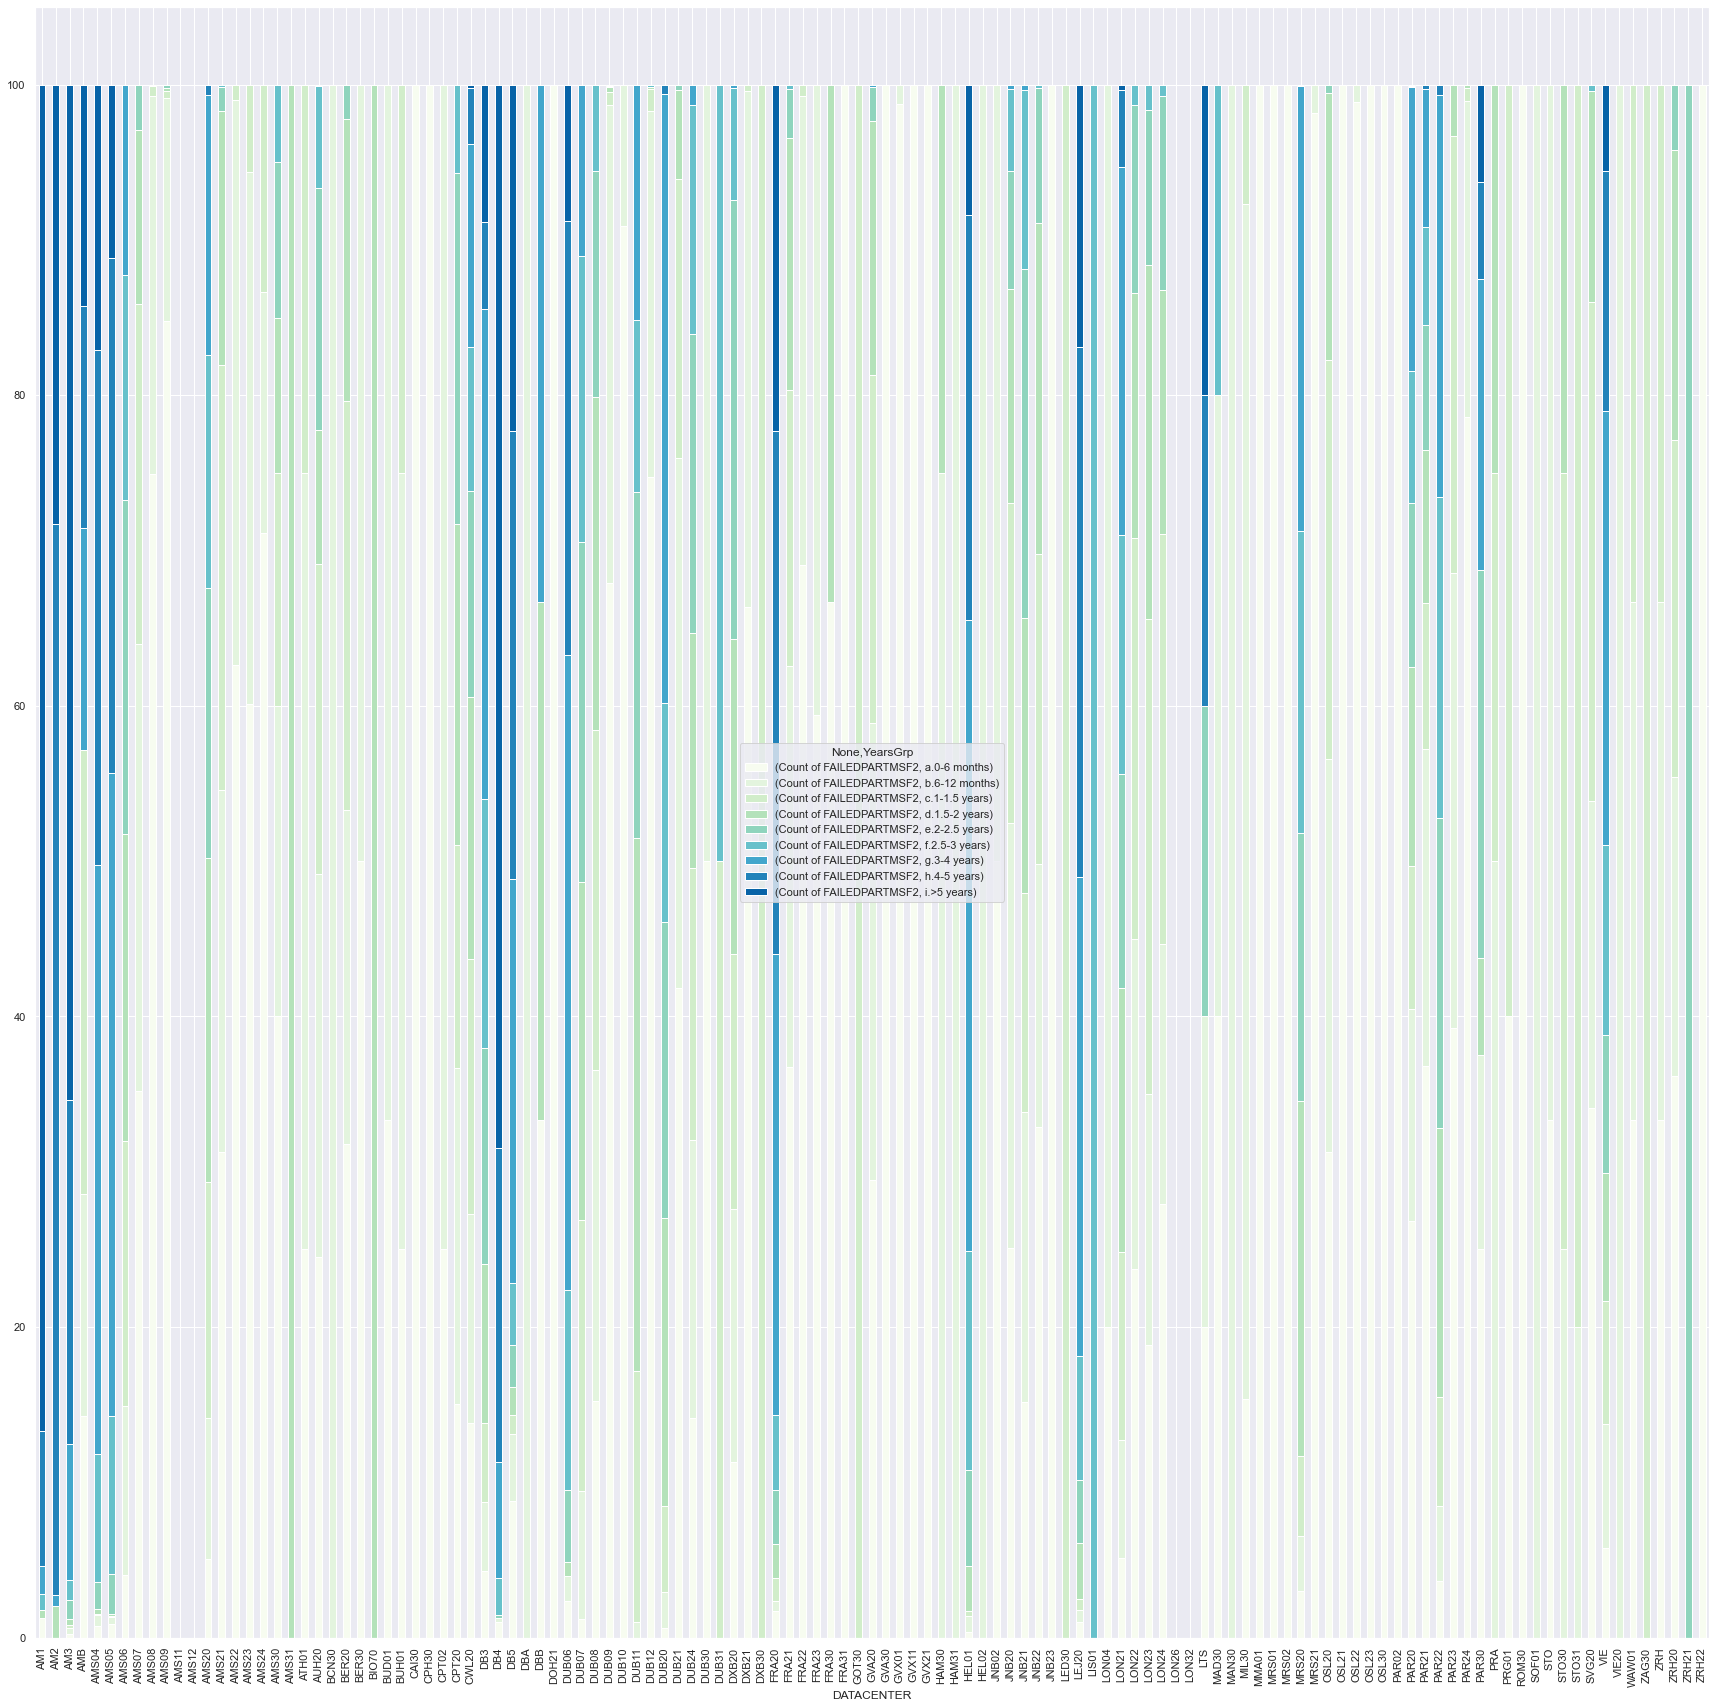

In [161]:
colors = plt.cm.GnBu(np.linspace(0, 1, 10))
df_failed_dc_age.plot.bar(stacked=True, figsize=(30,30), color=colors)

In [144]:
topd5_failed_by_dc = failedpartmsf_dc_age.sum(level=[0]).sort_values(ascending=False).head(5).index

In [145]:
topd5_failed_by_dc

Index(['AMS20', 'AMS06', 'DUB07', 'AMS07', 'DUB08'], dtype='object', name='DATACENTER')

### Top 5 Datacenter by failure count - stacked by age of parts

<AxesSubplot:xlabel='DATACENTER'>

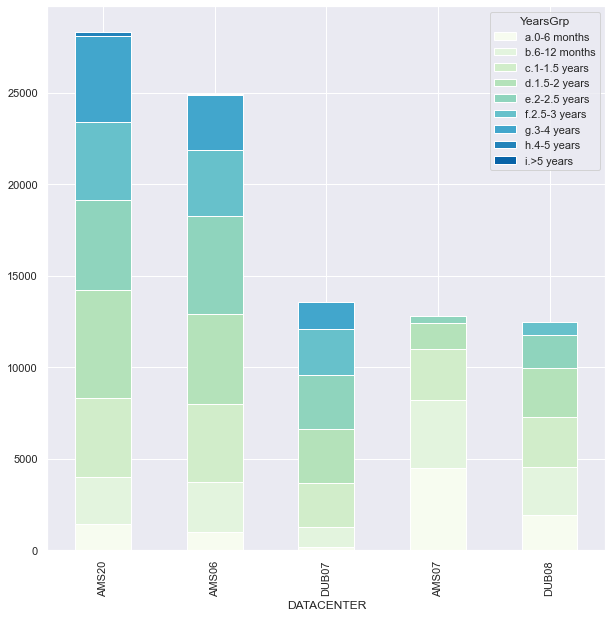

In [160]:
colors = plt.cm.GnBu(np.linspace(0, 1, 10))
failedpartmsf_dc_age.loc[list(topd5_failed_by_dc)].unstack().plot.bar(stacked=True, figsize=(10,10), color=colors)

In [162]:
def univariate_with_onhanddc(df_raw, feature):
    '''
    -------input--------
    df_raw = The raw dataframe containing raw data - DataTill233064 without outliers
    feature = The feature from raw dataset on which grouping is requried, Allowed values-FAILEDMANUFACTURER,
    SPAREMANUFACTURER, ISOUTOFSTOCK, ISOUTOFWARRANTY, COUNTRY, YearsGrp, FAILEDPARTMSF
    
    -------output-------
    pandas DataFrame with failed parts grouped by the feature containing Counts of FAILEDPARTMSF, percentage count of 
    FAILEDPARTMSF, Sum of ONHAND_DC
    '''
    # Create groupby obejct on the raw data with feature required:-
    df_raw_feature_group = df_raw.groupby(feature)
    # On the group object, aggregate on the counts of FAILEDPARTMSF, sort in descending
    df_failed_by_feature = df_raw_feature_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()
    
    # Rename FAILEDPARTMSF to 'Count of FAILEDPARTMSF'
    df_failed_by_feature.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)

    # Make percentage count of FAILEDMARTMSF for each feature as 'Count of FAILEDPARTMSF2'
    df_failed_by_feature['Count of FAILEDPARTMSF2']=(df_failed_by_feature['Count of FAILEDPARTMSF']/(df_failed_by_feature['Count of FAILEDPARTMSF'].sum()))*100

    # Find the Sum of ONHAND_DC for each Feature
    df_failed_by_feature['Sum of ONHAND_DC'] = df_raw_feature_group.sum()['ONHAND_DC'].loc[df_failed_by_feature[feature]].values
    
    return df_failed_by_feature
    

In [163]:
df_failed_by_country = univariate_with_onhanddc(df_raw_no_outlier, feature='COUNTRY')

In [165]:
df_failed_by_country.head()

,COUNTRY,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,Sum of ONHAND_DC
0,Netherlands,96571,43.083395,906472.0
1,Ireland,62738,27.989418,331226.0
2,United Kingdom,24902,11.109574,238203.0
3,Austria,12274,5.475822,308688.0
4,France,8388,3.742154,49337.0


In [166]:
df_failed_by_isoutofstock = univariate_with_onhanddc(df_raw_no_outlier, feature='ISOUTOFSTOCK')

In [167]:
df_failed_by_isoutofstock.head()

,ISOUTOFSTOCK,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,Sum of ONHAND_DC
0,0,200996,89.67071,2007590.0
1,1,23153,10.32929,83729.0


In [168]:
def univariate_with_fr(df_raw, feature, df_sparedetails):
    '''
    -------input--------
    df_raw = The raw dataframe containing raw data - DataTill233064 without outliers
    feature = The feature from raw dataset for with failure rate is required, Allowed values-DATACENTER,
    FAILEDPARTITEMGROUP
    df_sparedetails = The dataset with spare part details - raw data is merged on this data to calulate installedbase,
    followed by the FR%.
    -------output-------
    pandas DataFrame with failed parts grouped by the feature containing Counts of FAILEDPARTMSF, percentage count of 
    FAILEDPARTMSF, InstalledBase and FR%
    '''
    # Create groupby obejct on the raw data with feature required:-
    df_raw_feature_group = df_raw.groupby(feature)
    # On the group object, aggregate on the counts of FAILEDPARTMSF, sort in descending
    df_failed_by_feature = df_raw_feature_group.count()[['FAILEDPARTMSF']].sort_values(by='FAILEDPARTMSF',ascending=False).reset_index()
    
    # Rename FAILEDPARTMSF to 'Count of FAILEDPARTMSF'
    df_failed_by_feature.rename(columns={'FAILEDPARTMSF':'Count of FAILEDPARTMSF'}, inplace=True)

    # Make percentage count of FAILEDMARTMSF for each feature as 'Count of FAILEDPARTMSF2'
    df_failed_by_feature['Count of FAILEDPARTMSF2']=(df_failed_by_feature['Count of FAILEDPARTMSF']/(df_failed_by_feature['Count of FAILEDPARTMSF'].sum()))*100

    # Prepare for merge
    left_on = feature
    if feature == 'DATACENTER':
        right_on = 'DATACENTERCODE'
    if feature == 'FAILEDPARTITEMGROUP':
        right_on = 'BOMTYPE'
    # Sum of spares count grouped by feature
    df_sparedetails_feature_group = df_sparedetails.groupby(right_on)
    df_sparedetails_by_feature = df_sparedetails_feature_group.sum()[['count']].sort_values(by='count',ascending=False).reset_index()
    
    # Merge with df_sparedetails on feature to calculate InstalledBase and FR%
    df_failed_by_feature = df_failed_by_feature.merge(df_sparedetails_by_feature, left_on=left_on, right_on=right_on)
    df_failed_by_feature.drop(labels=right_on, axis=1, inplace=True)

    # Rename count to 'InstalledBase'
    df_failed_by_feature = df_failed_by_feature.rename(columns={'count':'InstalledBase'})
    # Calculate 'FR%'
    df_failed_by_feature['FR%'] = df_failed_by_feature['Count of FAILEDPARTMSF']/df_failed_by_feature['InstalledBase']*100
    
    return df_failed_by_feature

In [169]:
df_failed_by_dc2 = univariate_with_fr(df_raw_no_outlier, feature = 'DATACENTER', df_sparedetails = df_SparesAgeDetails_raw)

In [170]:
df_failed_by_dc2

,DATACENTER,Count of FAILEDPARTMSF,Count of FAILEDPARTMSF2,InstalledBase,FR%
0,AMS20,28299,12.625084,3055287,0.926230
1,AMS06,24904,11.110467,3163654,0.787191
2,DUB07,13585,6.060701,1572174,0.864090
3,AMS07,12772,5.697996,2894477,0.441254
4,DUB08,12462,5.559695,1705245,0.730804
...,...,...,...,...,...
97,MAN30,1,0.000446,2720,0.036765
98,ZRH22,1,0.000446,12,8.333333
99,AMS12,0,0.000000,90,0.000000
100,AMS11,0,0.000000,128,0.000000
